# Topic - Titanic Survival Analysis and Prediction
Develop an algorithm to predict the survival outcome of passengers on the Titanic

-------------------------------

**Project Summary**: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship.

Titanic had advanced safety features, such as watertight compartments and remotely activated watertight doors, contributing to its reputation as "unsinkable". The ocean liner carried some of the wealthiest people in the world, as well as hundreds of emigrants from Great Britain and Ireland, Scandinavia, and elsewhere throughout Europe, who were seeking a new life in the United States and Canada.

Titanic was equipped with 16 lifeboat davits, each capable of lowering three lifeboats, for a total of 48 boats; she carried only 20 lifeboats, four of which were collapsible and proved hard to launch while she was sinking (Collapsible A nearly swamped and was filled with a foot of water until rescue, Collapsible B completely overturned while launching). Together, the 20 lifeboats could hold 1,178 people—about half the number of passengers on board, and one third of the number of passengers the ship could have carried at full capacity (consistent with the maritime safety regulations of the era). When the ship sank, many of the lifeboats that had been lowered were only about half full.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**

# Importing Necessary Libraries

In [ ]:
!pip install numpy==1.22.0
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command that allows the plots to be displayed directly in the Jupyter Notebook.
import seaborn as sns # data visualization library based on matplotlib that provides a high-level interface for creating attractive and informative statistical graphics
import sklearn # A machine learning library in Python that provides a range of tools for data analysis, modeling, and evaluation.

pd.set_option('display.max_columns',500) 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.svm import SVC
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Read Data

In [ ]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [ ]:
train

In [ ]:
test

In [ ]:
sub

# UnderStanding Data

*    PassengerId is the unique id of the row and it doesn't have any effect on target
*    Survived is the target variable we are trying to predict (0 or 1):
    * 1 = Survived
    * 0 = Not Survived
* Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
    * 1 = Upper Class
    * 2 = Middle Class
    * 3 = Lower Class
* Name, Sex and Age are self-explanatory
* SibSp is the total number of the passengers' siblings and spouse
* Parch is the total number of the passengers' parents and children
* Ticket is the ticket number of the passenger
* Fare is the passenger fare
* Cabin is the cabin number of the passenger
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

Which features are available in the dataset?

**Which features are categorical?**

   * Categorical: **Survived, Sex, and Embarked**.
   * Ordinal: **Pclass**.
    
**What is the distribution of categorical features?**

* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

**Which features are numerical?**

   * Continous: **Age, Fare.**
   * Discrete: **SibSp, Parch.**
    
**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

* Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

* Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [ ]:
train.info(),print('\n'), test.info()

In [ ]:
train.describe(include='all')

In [ ]:
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file


# Generate the Profiling Report
profile = ProfileReport(
    train, title="Dataset", html={"style": {"full_width": True}}, sort=None
)
#profile

In [ ]:
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file


# Generate the Profiling Report
profile = ProfileReport(
    test, title="Dataset", html={"style": {"full_width": True}}, sort=None
)
#profile

no deplicate good, no need for id, extract title from name, convert 0 and 1 for sex, age min is 0.17, ticket 71% distinct best to drop, fare has outlier we need to treat them also create bin, cabin missing value drop, embarked use it for status.

In [ ]:
# for inverstgtion purpose I will combine both dataset
df = pd.concat([train, test], axis=0, ignore_index=True)
df

In [ ]:
data = train.copy(deep=True)
dataset = [data,test,df]

# Feature Engineering

* **Title**: we use split() on ',', '.' present in the Name.

* **Last Name**: using split() on Name column.

* **Family Size** can be calculate by summing the member of family acompanying them(+1 is for person itself):

    1. sibsp: The dataset defines family relations in this way...

        * Sibling = brother, sister, stepbrother, stepsister.

        * Spouse = husband, wife (mistresses and fiancés were ignored).

    2. parch: The dataset defines family relations in this way...
        * Parent = mother, father

        * Child = daughter, son, stepdaughter, stepson

        * Some children travelled only with a nanny, therefore parch=0 for them.
     
* **isAlone**: If Family Size is 1 then person was travelling Alone.

Done After Treating Missing Values:

* **Fare Bin**: Quantile-based discretization function.

* **Age Bin**: values into discrete intervals.

**Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut**


In [ ]:
for table in dataset:
    table['Title'] = table['Name'].str.split(", ",expand=True)[1].str.split(". ",expand=True)[0]
    table['Last Name'] = table['Name'].str.split(",", expand=True)[0]
    table['Family Size'] = table['SibSp'] + table['Parch'] + 1
    table['isAlone'] = table['Family Size'].apply(lambda x: 1 if x == 1 else 0)

# Data Cleaning: Correcting, Completing, Creating, and Converting

# Dropping

In [ ]:
for table in dataset:
    table.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)

# Missing Values (Creating)
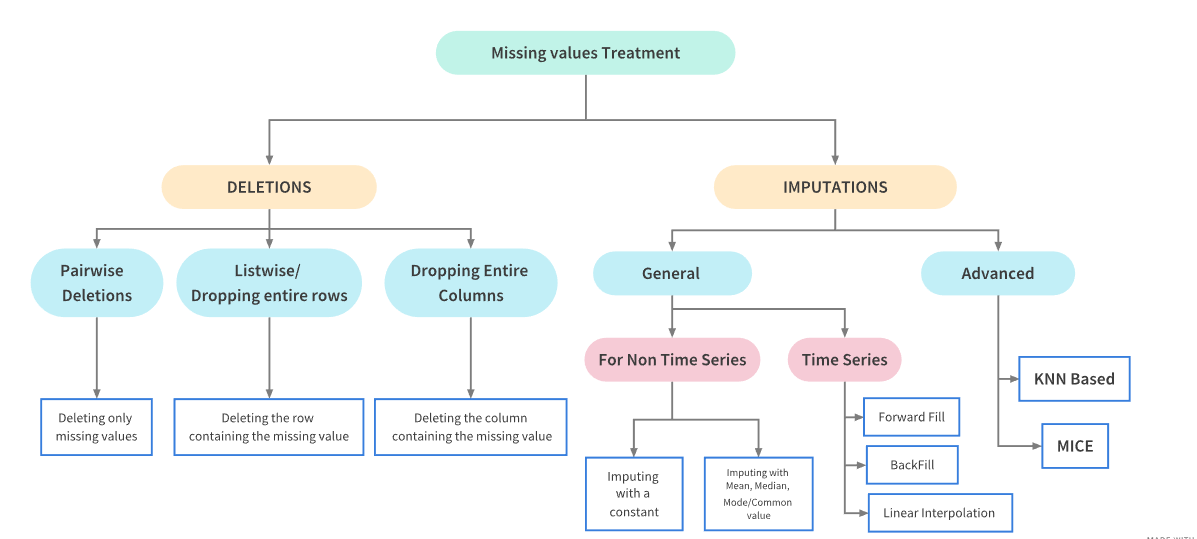

we need to address this issue before we proceed with the modeling stuff. It is also important to note that some algorithms like XGBoost and LightGBM can treat missing data without any preprocessing.

In [ ]:
print('Train dataset\n{}'.format(data.isnull().sum()))
print('\n   Test dataset\n{}'.format(test.isnull().sum()))

## Emabarked: Port of Embarkation

C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
data[data['Embarked'].isnull() == True]

The two missing values have fare 80, pclass 1, cabin B28, same Ticket number. From countplot we see Embarked C is common around for Pclass 1 above Fare 60.

Since Embarked is categorical value, we will use mode (most frequent value)

In [ ]:
embark = df.loc[(df['Pclass']==1) & (df['Fare']>60) & (df['Sex']=='female') & (df['isAlone']==1)]
#t = df.loc[(df['Pclass']==1)]
sns.countplot(embark, x='Embarked');

In [ ]:
# Fill Embarked in train copy dataset

data['Embarked'].fillna(embark['Embarked'].mode()[0], inplace=True)

## Fare: Passenger fare

Cabin is emtpy otherwise it could have been beneficial. This person is travelling alone.

we use these conditions Age, pclass, Embarked  Passenger colrelate to around Fare = 8.0 but without conditions 14.45

We will use median with conditions on table

In [ ]:
test[test['Fare'].isnull() == True]

In [ ]:
fare = df[(df['Pclass']==3) & (df['Sex']=='male') & (df['Embarked']=='S') & (df['isAlone']==1)]

sns.jointplot(data=fare, x='Fare', y='Age')

In [ ]:
fare['Fare'].median(), df['Fare'].median() # compare to no condition

In [ ]:
# Filling value

test['Fare'].fillna(fare['Fare'].median(),inplace=True)

## Age

263 rows have null value in age column. we seprate the child one from adult using title in name. 

Utilized **mask()** to fill values with condition.

In Miss,Mrs,Mr, Case: we will class condition to get the mean.

In Master Case: we have missing values only in 3rd class, From jointplot we can see Fare, Age, and Embarked have minimum impact.

In [ ]:
df.loc[df['Age'].isnull()].Title.value_counts()

### Miss Case

In [ ]:
f = df.loc[(df['Title']=='Miss')]
sns.jointplot(f, x='Age', y='Pclass', hue='Survived')

mr1_age = df.loc[(df['Title'] == 'Miss') & (df['Pclass'] == 1), 'Age'].mean()
mr2_age = df.loc[(df['Title'] == 'Miss') & (df['Pclass'] == 2), 'Age'].mean()
mr3_age = df.loc[(df['Title'] == 'Miss') & (df['Pclass'] == 3), 'Age'].mean()

# Filling Values

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Miss') & (table['Pclass'] == 1) & table['Age'].isnull(), mr1_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Miss') & (table['Pclass'] == 2) & table['Age'].isnull(), mr2_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Miss') & (table['Pclass'] == 3) & table['Age'].isnull(), mr3_age)

### Mrs Case

In [ ]:
f = df.loc[(df['Title']=='Mrs')]
sns.jointplot(f, x='Age', y='Pclass', hue='Survived')

mr1_age = df.loc[(df['Title'] == 'Mrs') & (df['Pclass'] == 1), 'Age'].mean()
mr2_age = df.loc[(df['Title'] == 'Mrs') & (df['Pclass'] == 2), 'Age'].mean()
mr3_age = df.loc[(df['Title'] == 'Mrs') & (df['Pclass'] == 3), 'Age'].mean()

# Filling value

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Mrs') & (table['Pclass'] == 1) & table['Age'].isnull(), mr1_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Mrs') & (table['Pclass'] == 2) & table['Age'].isnull(), mr2_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Mrs') & (table['Pclass'] == 3) & table['Age'].isnull(), mr3_age)

### Mr Case

In [ ]:
mr1_age = df.loc[(df['Title'] == 'Mr') & (df['Pclass'] == 1), 'Age'].mean()
mr2_age = df.loc[(df['Title'] == 'Mr') & (df['Pclass'] == 2), 'Age'].mean()
mr3_age = df.loc[(df['Title'] == 'Mr') & (df['Pclass'] == 3), 'Age'].mean()

# filling values

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Mr') & (table['Pclass'] == 1) & table['Age'].isnull(), mr1_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Mr') & (table['Pclass'] == 2) & table['Age'].isnull(), mr2_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Mr') & (table['Pclass'] == 3) & table['Age'].isnull(), mr3_age)

### Ms Case

In [ ]:
Ms_age = df.loc[df['Title']=='Ms'].Age.mean()

# filling values

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Ms') & table['Age'].isnull(), Ms_age)

### Dr case

In [ ]:
Dr_age = df.loc[(df['Title']=='Dr') & (df['Sex']=='male') & (df['Pclass']==1)].Age.mean()

# Filling value

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Dr') & table['Age'].isnull(), Dr_age)

### Master Case



In [ ]:
master_null_df = df.loc[(df['Age'].isnull()) & (df['Title']=='Master')]

master_age_df = df.loc[(df['Title']=='Master') & (df['Pclass']==3)]

sns.jointplot(master_age_df, x='Age', hue='Embarked', y='Fare')
plt.axvline(x=master_age_df['Age'].median());

# Filling value

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Master') & table['Age'].isnull(), master_age_df['Age'].median())

### Double Checking Null Values

In [ ]:
print('Train dataset\n{}'.format(data.isnull().sum()))
print('\n   Test dataset\n{}'.format(test.isnull().sum()))

## Title
    * Mrs is a title for mairred and windowed females.
    * Miss is a title for unmairred and under age, below the age of 18, females.
    * Master is a title for an underage male. If a person is under 18, master would be used. Once a person turns 18 and enters adulthood, Mister would be used.
    * Mister is a title for adult male over the age 18.
    
Grouping Titles with less then 10 entries

In [ ]:
pd.crosstab(df.Title,df.Sex).T.style.background_gradient(cmap='summer_r')  # Checking the Initials with the Sex

In [ ]:
for table in dataset:
    table['Fare qcut'] = pd.qcut(table['Fare'],5)
    table['Age cut'] = pd.cut(table['Age'],5)

    Misc_limit = 10 # if number of entries is less then 10, we were grouping them in Misc
    Title_list = table.Title.value_counts() < Misc_limit

    table['Title'] = table['Title'].apply(lambda x: 'Misc' if x in Title_list.loc[Title_list==True] else x)

print(data['Title'].value_counts())
print(pd.crosstab(data['Title'],data['Survived']))

In [ ]:
# Data visualization
sns.pointplot(data=data, hue='isAlone', x='Title', y='Survived', palette=['Yellow', 'Red'], errwidth=1)

# Labels and title
plt.xlabel('Passenger Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rate of Individuals Aboard the Titanic based on Passenger Title and Traveling Alone Status')

# Create custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Alone', markerfacecolor='Yellow', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Not Alone', markerfacecolor='Red', markersize=10)
]
plt.legend(handles=legend_elements, title='Traveling Alone', loc='upper left')

# Show the plot
plt.show()

In [ ]:
"""from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(train[['Age','Fare']])
train.info()"""

# Convert Format

We will convert categorical data to dummy variables for mathematical analysis.

In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.

** Developer Documentation: **
* [Categorical Encoding](http://pbpython.com/categorical-encoding.html)
* [Sklearn LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
* [Sklearn OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* [Pandas Categorical dtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html)
* [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

since len(data['Last Name'].value_counts()) = 667 we will not be using last name 

In [ ]:
# Label Encoding for Age and Fare bins
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for table in dataset:
    table['Fare Bin'] = label.fit_transform(table['Fare qcut'])
    table['Age Bin'] = label.fit_transform(table['Age cut'])

# One-Hot Encoding
features = ["Pclass", "Sex", "SibSp", "Parch", "Title", "Family Size", "isAlone", "Fare Bin", "Age Bin", "Age", "Embarked", "Fare"]
X = pd.get_dummies(data[features])
X_test = pd.get_dummies(test[features])

# Target
y = data["Survived"]
y_test = sub['Survived']

In [ ]:
cor = ['Survived'] + features
correlation_matrix = data[cor].corr(numeric_only=True)

# Filter out the columns with categorical values
numerical_features = data[cor].select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr(numeric_only=True)

plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
cor = X.copy(deep=True)
cor['Survived'] = data['Survived']
correlation_matrix = cor.corr(numeric_only=True)

# Filter out the columns with categorical values
numerical_features = cor.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr(numeric_only=True)

plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
X.head()

# Model

In [ ]:
random_state = 42
classifier = [RandomForestClassifier(random_state = random_state)]

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[1000],
                "criterion":["gini"]}

classifier_param = [rf_param_grid]

cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=rf_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X,y)
    print(clf.best_score_)
    print(clf.best_estimator_)

* with  "Embarked" = 0.8305
* without  "Embarked" = 0.8305243445692883
* with Age = 0.8350811485642946

In [ ]:
model = RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=10,
                       n_estimators=1000, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

In [ ]:
model = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

In [ ]:
# Code to get 100% on submission result
#submission = pd.read_csv('/kaggle/input/titanic-competition-how-top-lb-got-their-score/submission.csv')
#submission.to_csv('submission.csv', index=False)

In [ ]:
sub['Survived'] = predictions
sub.to_csv('submission.csv', index=False)